# **SPOTIPY ANALYSIS**

| Name           | Roll No. | Course                     | Semester |
| -------------- | -------- | -------------------------- | -------- |
| Pratham Sharma | AC-1232  | B.Sc. (H) Computer Science | 5        |
| Raj Khatri     | AC-1235  | B.Sc. (H) Computer Science | 5        |

### **Subject** : Data Analysis and Visualization

### **Submitted To** : Dr. Sharanjit Kaur

### **Date of Submission** : 10th November 2022


# **Introduction**
Spotify is a proprietary Swedish audio streaming and media services provider founded on 23 April 2006 by Daniel Ek and Martin Lorentzon. It is one of the largest music streaming service providers, with over 456 million monthly active users, including 195 million paying subscribers, as of September 2022. Spotify is listed (through a Luxembourg City-domiciled holding company, Spotify Technology S.A.) on the New York Stock Exchange in the form of American depositary receipts.

Spotify offers digital copyright restricted recorded music and podcasts, including more than 82 million songs, from record labels and media companies. As a freemium service, basic features are free with advertisements and limited control, while additional features, such as offline listening and commercial-free listening, are offered via paid subscriptions. Users can search for music based on artist, album, or genre, and can create, edit, and share playlists.


When Spotify entered India 3 years back, the audio streaming industry in the country was just getting heated up. People were still getting used to the idea of paying a subscription for listening to music. 3 years later, things are changing.
For Spotify, it has been an interesting journey. 

India now figures in the top 20 markets for the Swedish audio streaming platform globally in terms of user created playlists. The platform recently revealed that it saw a 165% increase in its premium subscriber base in Q421, and India and Indonesia were important drivers for this growth. Gustav Gyllenhammar, VP of Markets and Subscriber Growth for Spotify Technology SA also shared in a recent interview that the number of subscribers in India had doubled in 2021.

## **Objective**

1. To analyse a user created playlist on spotify.
2. Analysing songs and artists from different generations on the factors such as :
   - danceability
   - energy
   - key
   - loudness
   - mode
   - speechiness
   - acousticness
   - instrumentalness
   - liveness
   - valence
5. Comparative Analysis of artists and songs, with other songs of their album.

## **Steps**

1. Creating a Spotify Account
2. Registering the Spotify Developer Program
3. Creating spotify credentials for the project
4. Fetching the required dataset of the playlist using the spotify audio feature to csv tool
5. Storing the data in a pandas database
8. Analysing data and Plotting graphs using pandas, numpy, Matplotlib and plotly

### importing modules

### **Spotify Playlist**
https://open.spotify.com/playlist/7gKVccRxsOD0gKdUv63HoB?si=235e6601d9744186

### **Tool for fetching dataset**

https://github.com/kvithana/spotify-audio-features-to-csv


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from math import pi
import matplotlib.pyplot as plt
import re
import time
from datetime import datetime
import pandas as pd
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = "png"


### loading dataaset

In [2]:
FeatureDF = pd.read_csv('./data/features/features.csv')
TracksDF = pd.read_csv('./data/tracks/tracks.csv')


### displaying tracks dataset

In [3]:
TracksDF.head()


,playlist_uri,album,album_uri,artist,artist_uri,disc_number,duration_ms,name,popularity,explicit,uri,link
0,spotify:playlist:7gKVccRxsOD0gKdUv63HoB,The Way That Lovers Do,spotify:album:4WLh56ZjwINYBNhaxLvEhA,Prateek Kuhad,spotify:artist:0tC995Rfn9k2l7nqgCZsV7,1,153693,All I Need,55,False,spotify:track:47hXMyQDGW8sA1NGqmFL7h,https://api.spotify.com/v1/tracks/47hXMyQDGW8s...
1,spotify:playlist:7gKVccRxsOD0gKdUv63HoB,The Way That Lovers Do,spotify:album:4WLh56ZjwINYBNhaxLvEhA,Prateek Kuhad,spotify:artist:0tC995Rfn9k2l7nqgCZsV7,1,204373,Hollow,40,False,spotify:track:1y7FoHfVtbZV6mONGJgU7j,https://api.spotify.com/v1/tracks/1y7FoHfVtbZV...
2,spotify:playlist:7gKVccRxsOD0gKdUv63HoB,The Way That Lovers Do,spotify:album:4WLh56ZjwINYBNhaxLvEhA,Prateek Kuhad,spotify:artist:0tC995Rfn9k2l7nqgCZsV7,1,193733,Favorite Peeps,44,False,spotify:track:0SHa9XHwYYB1UUmgbgHuhQ,https://api.spotify.com/v1/tracks/0SHa9XHwYYB1...
3,spotify:playlist:7gKVccRxsOD0gKdUv63HoB,The Way That Lovers Do,spotify:album:4WLh56ZjwINYBNhaxLvEhA,Prateek Kuhad,spotify:artist:0tC995Rfn9k2l7nqgCZsV7,1,163653,Co2,53,False,spotify:track:3hB9lDLyAClYVZivMMl20N,https://api.spotify.com/v1/tracks/3hB9lDLyAClY...
4,spotify:playlist:7gKVccRxsOD0gKdUv63HoB,The Way That Lovers Do,spotify:album:4WLh56ZjwINYBNhaxLvEhA,Prateek Kuhad,spotify:artist:0tC995Rfn9k2l7nqgCZsV7,1,184413,Face,39,False,spotify:track:0HuS5vFQd06cXV54I0twkV,https://api.spotify.com/v1/tracks/0HuS5vFQd06c...


### displaying features dataset

In [4]:
FeatureDF.head()


,playlist_uri,duration_ms,key,mode,time_signature,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,uri
0,spotify:playlist:7gKVccRxsOD0gKdUv63HoB,153693,6,1,4,0.771,0.786,0.356,0.6940,0.100,-11.432,0.0462,0.5190,116.023,spotify:track:47hXMyQDGW8sA1NGqmFL7h
1,spotify:playlist:7gKVccRxsOD0gKdUv63HoB,204373,11,1,4,0.845,0.348,0.310,0.0569,0.111,-13.122,0.0413,0.0474,114.812,spotify:track:1y7FoHfVtbZV6mONGJgU7j
2,spotify:playlist:7gKVccRxsOD0gKdUv63HoB,193733,7,1,4,0.767,0.611,0.525,0.7990,0.112,-9.683,0.0354,0.2990,113.946,spotify:track:0SHa9XHwYYB1UUmgbgHuhQ
3,spotify:playlist:7gKVccRxsOD0gKdUv63HoB,163653,1,1,4,0.663,0.533,0.678,0.0000,0.145,-5.244,0.0256,0.6830,80.960,spotify:track:3hB9lDLyAClYVZivMMl20N
4,spotify:playlist:7gKVccRxsOD0gKdUv63HoB,184413,7,1,4,0.920,0.481,0.669,0.0219,0.139,-13.329,0.4550,0.3510,128.219,spotify:track:0HuS5vFQd06cXV54I0twkV


Since Danceability, Energy, Speech, Acousticness, Instrumentalness, Liveness, Valence share the same scale, they would be usually grouped together and compared in data visualisations.

## **Spotify audio features**
A description of the all the retrieved features in the official Spotify API docs: https://developer.spotify.com/documentation/web-api/reference/#/operations/get-audio-features

* **acousticness**
>A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

* **danceability**
>Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

* **duration_ms**
>The duration of the track in milliseconds.

* **energy**
>Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

* **instrumentalness**
>Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

* **liveness**
>Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

* **speechiness**
>Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

* **loudness**
>The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.

* **tempo**
>The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

* **valence**
>A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

* **popularity**
>The popularity of the artist. The value will be between 0 and 100, with 100 being the most popular. The artist's popularity is calculated from the popularity of all the artist's tracks.

### creating a array to plot histogram of these columns

In [5]:
categories = ['danceability',
              'energy',
              'speechiness',
              'acousticness',
              'liveness',
              'valence']


# **KEY**
The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.

Plotting the Key data from the tracks feature Dataframe shows us that the most used keys i.e. E & F

### key and there count

<AxesSubplot: xlabel='key', ylabel='Count'>

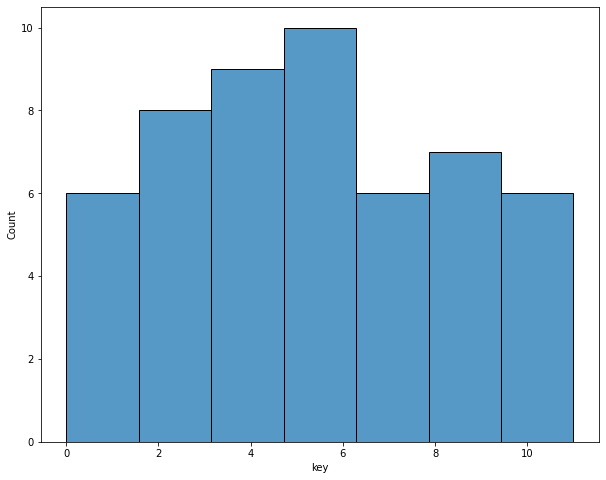

In [6]:
plt.figure(figsize=[10, 8])
sns.histplot(FeatureDF, x='key')


### Plotting pie chart of mode of songs

## **MAJOR and MINOR**

0: Minor
1: Major

Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

Pie Chart below shows that the majority of songs have Major Modality

### 0: Minor 1: Major


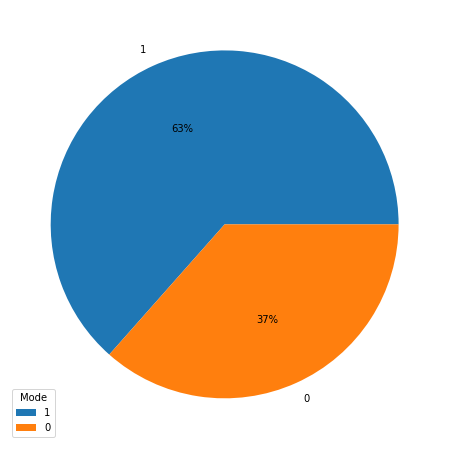

<Figure size 432x288 with 0 Axes>

In [7]:
plt.figure(figsize=[10, 8])

mode = list(FeatureDF['mode'].value_counts().index)
size = list(FeatureDF['mode'].value_counts())

plt.pie(size, labels=mode, autopct='%1.0F%%')
plt.legend(mode, title='Mode', loc='best')
plt.figure(facecolor='white')
plt.show()


### Distribution of Spotify metrics of Playlist

The plot below shows the distribution of scores for all tracks in the given playlist. Most songs are typically high-energy but the songs usually fall within the mid-level for danceability.

- Most of the songs have high energy, Dancebility and surprisingly acousticness.
- Acoustic songs generally not associated with these two factors.
- This result can be attributed to new age indie songs and their emphasis on beats over vocals

[Text(0.5, 1.0, 'Valence')]

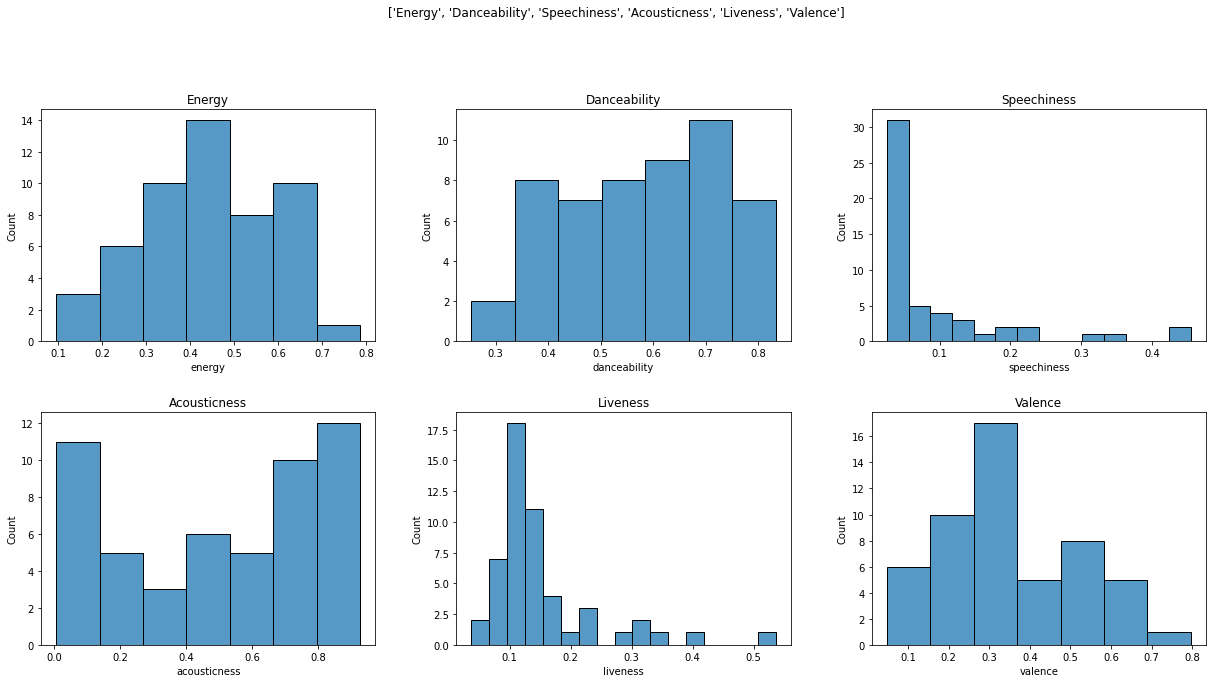

In [8]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

fig.suptitle(['Energy', 'Danceability', 'Speechiness',
             'Acousticness', 'Liveness', 'Valence'])

fig.tight_layout(pad=5.0)

sns.histplot(ax=axes[0, 0], data=FeatureDF, x='energy').set(title='Energy')
sns.histplot(ax=axes[0, 1], data=FeatureDF,
             x='danceability').set(title="Danceability")
sns.histplot(ax=axes[0, 2], data=FeatureDF,
             x='speechiness').set(title='Speechiness')
sns.histplot(ax=axes[1, 0], data=FeatureDF,
             x='acousticness').set(title='Acousticness')
sns.histplot(ax=axes[1, 1], data=FeatureDF, x='liveness').set(title='Liveness')
sns.histplot(ax=axes[1, 2], data=FeatureDF, x='valence').set(title='Valence')


## **Data Filtering**
The data taken from the Spotify API stores the same track in multiple rows for multiple artists. So, for a song with 3 artists there will be 3 entries.
To reduce this redundancy we first combine the tracks data on the basis of the song name and album name

### Tracks dataset

In [9]:
TracksDF.head()


,playlist_uri,album,album_uri,artist,artist_uri,disc_number,duration_ms,name,popularity,explicit,uri,link
0,spotify:playlist:7gKVccRxsOD0gKdUv63HoB,The Way That Lovers Do,spotify:album:4WLh56ZjwINYBNhaxLvEhA,Prateek Kuhad,spotify:artist:0tC995Rfn9k2l7nqgCZsV7,1,153693,All I Need,55,False,spotify:track:47hXMyQDGW8sA1NGqmFL7h,https://api.spotify.com/v1/tracks/47hXMyQDGW8s...
1,spotify:playlist:7gKVccRxsOD0gKdUv63HoB,The Way That Lovers Do,spotify:album:4WLh56ZjwINYBNhaxLvEhA,Prateek Kuhad,spotify:artist:0tC995Rfn9k2l7nqgCZsV7,1,204373,Hollow,40,False,spotify:track:1y7FoHfVtbZV6mONGJgU7j,https://api.spotify.com/v1/tracks/1y7FoHfVtbZV...
2,spotify:playlist:7gKVccRxsOD0gKdUv63HoB,The Way That Lovers Do,spotify:album:4WLh56ZjwINYBNhaxLvEhA,Prateek Kuhad,spotify:artist:0tC995Rfn9k2l7nqgCZsV7,1,193733,Favorite Peeps,44,False,spotify:track:0SHa9XHwYYB1UUmgbgHuhQ,https://api.spotify.com/v1/tracks/0SHa9XHwYYB1...
3,spotify:playlist:7gKVccRxsOD0gKdUv63HoB,The Way That Lovers Do,spotify:album:4WLh56ZjwINYBNhaxLvEhA,Prateek Kuhad,spotify:artist:0tC995Rfn9k2l7nqgCZsV7,1,163653,Co2,53,False,spotify:track:3hB9lDLyAClYVZivMMl20N,https://api.spotify.com/v1/tracks/3hB9lDLyAClY...
4,spotify:playlist:7gKVccRxsOD0gKdUv63HoB,The Way That Lovers Do,spotify:album:4WLh56ZjwINYBNhaxLvEhA,Prateek Kuhad,spotify:artist:0tC995Rfn9k2l7nqgCZsV7,1,184413,Face,39,False,spotify:track:0HuS5vFQd06cXV54I0twkV,https://api.spotify.com/v1/tracks/0HuS5vFQd06c...


### Copy of tracks dataframe having name album and uri columns

In [10]:
tracksDF2 = TracksDF.groupby(['name', 'album', 'uri'])[
    'artist'].apply(','.join).reset_index()
# tracksDF2 = TracksDF.groupby('album').agg(lambda x: ''.join(set(x)))
# tracksDF2 = TracksDF.groupby(['album','name','uri'])['artist'].apply(','.join).reset_index()
tracksDF2


,name,album,uri,artist
0,0 to 100,No Name,spotify:track:7cVe3mYMIfhOlz1NXFWv70,Sidhu Moose Wala
1,051021,Scars & Screws,spotify:track:6D0RJju2TSMtZM1jsRc58S,"Shamoon Ismail,Talha Anjum"
2,All I Need,The Way That Lovers Do,spotify:track:47hXMyQDGW8sA1NGqmFL7h,Prateek Kuhad
3,All Night Long,Scars & Screws,spotify:track:308ngBPHBQa8HW4n0PBUKh,Shamoon Ismail
4,Ari Ari,Baaraat,spotify:track:3edqjLVQrRPLvt9FAYUAsT,"Ritviz,Nucleya"
5,Baaraat,Baaraat,spotify:track:0YLSjVxSb5FT1Bo8Tnxr8j,"Ritviz,Nucleya"
6,Bloodlust (feat. Mr. Capone-E),No Name,spotify:track:1O00WM9qGLUBA5gq2yw0WF,"Sidhu Moose Wala,Mr. Capone-E"
7,Bloom,The Way That Lovers Do,spotify:track:39lOHITmszIVH9WF4Jpbum,Prateek Kuhad
8,Chaunde Ne Pharna,Scars & Screws,spotify:track:18sA3ZuFnaYvinSyc1EZ0M,Shamoon Ismail
9,Co2,The Way That Lovers Do,spotify:track:3hB9lDLyAClYVZivMMl20N,Prateek Kuhad


Now we combine the 2 Dataframes fetched from the Playlist to create a DataFrame containing a Song's name, album name, Artists and its several features

In [11]:
DF1 = pd.merge(tracksDF2, FeatureDF, on="uri")
DF1.head()


,name,album,uri,artist,playlist_uri,duration_ms,key,mode,time_signature,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo
0,0 to 100,No Name,spotify:track:7cVe3mYMIfhOlz1NXFWv70,Sidhu Moose Wala,spotify:playlist:7gKVccRxsOD0gKdUv63HoB,108493,8,1,4,0.1390,0.742,0.675,0.000000,0.1670,-6.551,0.0907,0.679,145.989
1,051021,Scars & Screws,spotify:track:6D0RJju2TSMtZM1jsRc58S,"Shamoon Ismail,Talha Anjum",spotify:playlist:7gKVccRxsOD0gKdUv63HoB,211544,2,1,4,0.0641,0.679,0.661,0.003270,0.0976,-8.928,0.1240,0.388,169.979
2,All I Need,The Way That Lovers Do,spotify:track:47hXMyQDGW8sA1NGqmFL7h,Prateek Kuhad,spotify:playlist:7gKVccRxsOD0gKdUv63HoB,153693,6,1,4,0.7710,0.786,0.356,0.694000,0.1000,-11.432,0.0462,0.519,116.023
3,All Night Long,Scars & Screws,spotify:track:308ngBPHBQa8HW4n0PBUKh,Shamoon Ismail,spotify:playlist:7gKVccRxsOD0gKdUv63HoB,190358,7,1,4,0.0554,0.756,0.436,0.031100,0.3090,-7.262,0.0457,0.228,101.933
4,Ari Ari,Baaraat,spotify:track:3edqjLVQrRPLvt9FAYUAsT,"Ritviz,Nucleya",spotify:playlist:7gKVccRxsOD0gKdUv63HoB,167472,0,1,4,0.0052,0.721,0.676,0.000003,0.2050,-6.534,0.0450,0.394,140.080


### grouping on the basis of album

The summaryDF groups the data on the basis of album name and takes the average of the features of all the songs in that album

In [12]:
summaryDF = DF1.groupby("album").mean().reset_index()
summaryDF


,album,duration_ms,key,mode,time_signature,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo
0,Baaraat,206257.000000,3.750000,0.500000,4.000000,0.169650,0.704250,0.597250,6.450000e-07,0.219900,-7.001750,0.069000,0.528500,126.792000
1,No Name,171279.200000,7.400000,0.600000,4.200000,0.156220,0.734000,0.654000,0.000000e+00,0.130060,-7.104400,0.180800,0.589400,131.594600
2,Scars & Screws,191376.916667,4.833333,0.583333,4.000000,0.166125,0.660167,0.434833,2.684601e-02,0.155367,-10.763917,0.151433,0.311500,115.787083
3,The Civil Wars,215217.750000,4.833333,0.666667,3.833333,0.740250,0.412083,0.319567,1.440484e-03,0.118400,-9.798500,0.033950,0.290917,131.534417
4,The Way That Lovers Do,179061.636364,5.272727,0.909091,4.000000,0.772091,0.543455,0.458818,1.653695e-01,0.120173,-10.351545,0.074764,0.341218,109.082909
5,rapunzel,197277.125000,5.875000,0.375000,4.000000,0.656625,0.595875,0.441250,4.528588e-03,0.210000,-10.232625,0.071925,0.321750,101.885875


### Comparing various features between albums

The Plot below shows a pictorial linechart representation of each album can be viewed below

### Trace using plotly

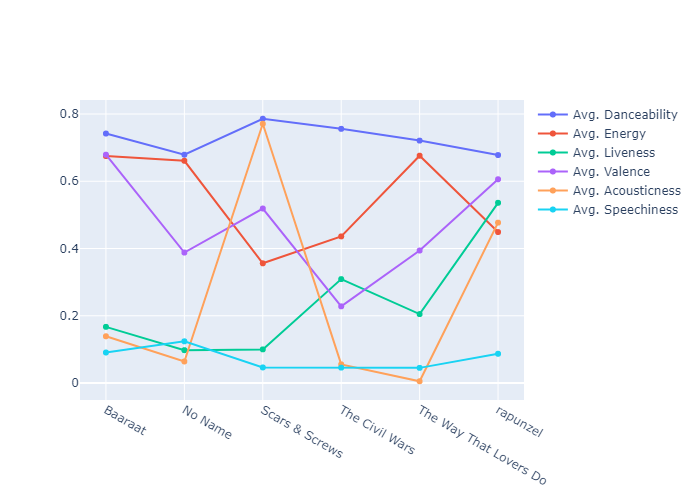

In [13]:
album = summaryDF['album']
fig = go.Figure()
fig.add_trace(go.Scatter(x=album, y=DF1['danceability'],
                         mode='lines+markers', name='Avg. Danceability',))
fig.add_trace(go.Scatter(x=album, y=DF1['energy'],
                         mode='lines+markers', name='Avg. Energy'))
fig.add_trace(go.Scatter(x=album, y=DF1['liveness'],
                         mode='lines+markers', name='Avg. Liveness'))
fig.add_trace(go.Scatter(x=album, y=DF1['valence'],
                         mode='lines+markers', name='Avg. Valence'))
fig.add_trace(go.Scatter(x=album, y=DF1['acousticness'],
                         mode='lines+markers', name='Avg. Acousticness'))
fig.add_trace(go.Scatter(x=album, y=DF1['speechiness'],
                         mode='lines+markers', name='Avg. Speechiness'))


In [14]:
summaryDF['album']


0                   Baaraat
1                   No Name
2            Scars & Screws
3            The Civil Wars
4    The Way That Lovers Do
5                  rapunzel
Name: album, dtype: object

Finally, the plots below compares the different songs of an album in the form of a Radar Graph.

As averages are easily affected by outliers, a more comprehensive breakdown by each album is done to identify the overall signature/characteristics of each song in an album.

### Polar charts between features using plotly library album wise

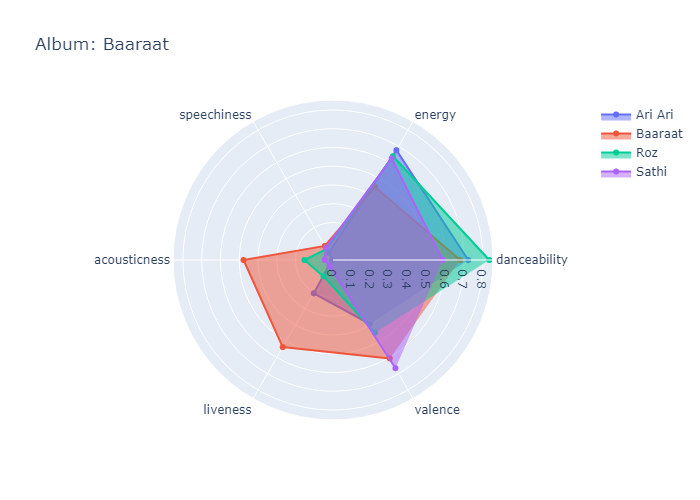

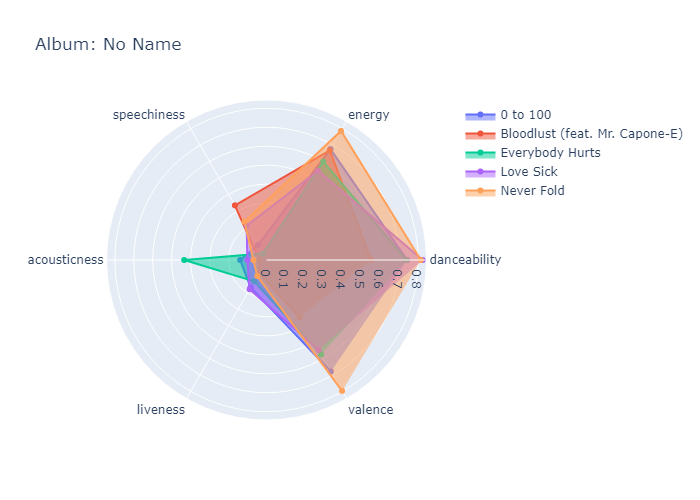

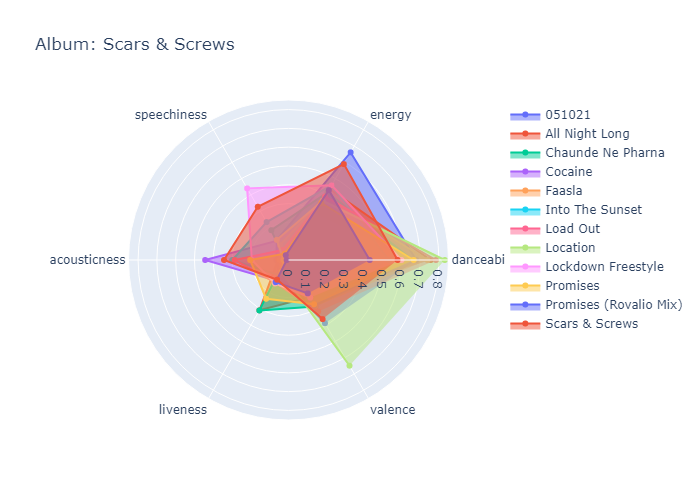

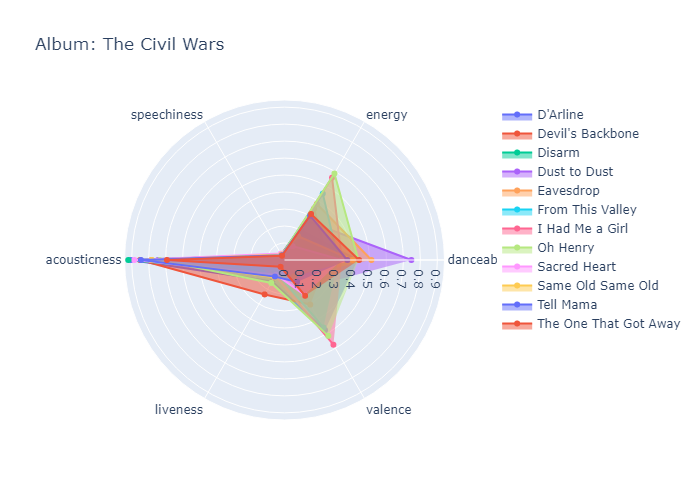

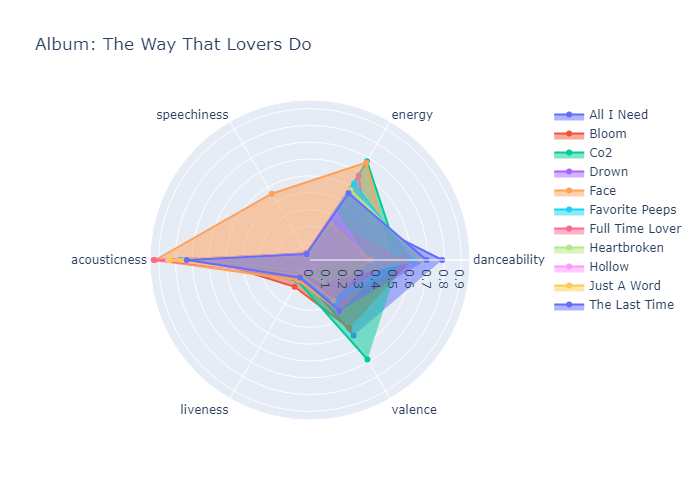

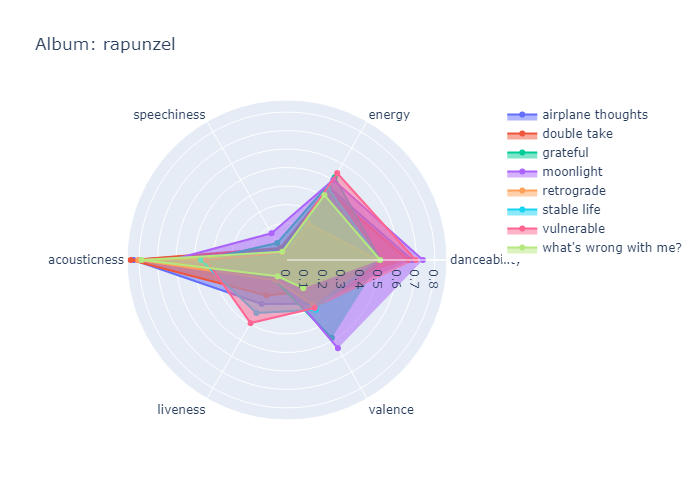

In [15]:
fig = go.Figure()
album_names = summaryDF['album']
for a in album_names:
    temp = DF1[DF1["album"] == a]
    for index, row in temp.iterrows():
        fig.add_trace(go.Scatterpolar(
            r=row[categories],
            theta=categories,
            fill='toself',
            name=row["name"]
        ))
    fig.update_layout(title="Album: " + a)
    fig.show()
    fig = go.Figure()


# Analysis of Top 50 Artist India

### loading dataset

In [16]:
# importing dataset of top50 indian artists
Top50IndArtistDF = pd.read_csv(".\data\top50\SingerAndSongs.csv")
Top50IndArtistDF.head()


,Singer,acousticness,danceability,energy,id,instrumentalness,key,liveness,loudness,mode,Song name,speechiness,tempo,track_href,valence
0,Aastha Gill,0.48500,0.770,0.824,39ujbBjTwwqUFySaCYDMMT,0.000000,1,0.3180,-6.491,0,Proper Patola,0.0851,172.006,https://api.spotify.com/v1/tracks/39ujbBjTwwqU...,0.490
1,Aastha Gill,0.14300,0.825,0.666,5cjVsWqIkBQC7acTRhL0RO,0.000003,4,0.2370,-4.847,0,Kamariya,0.0554,96.987,https://api.spotify.com/v1/tracks/5cjVsWqIkBQC...,0.763
2,Aastha Gill,0.23600,0.663,0.551,3XYvdqcZrTmRntFDDbJkJd,0.000036,3,0.0923,-8.272,0,Buzz (feat. Badshah),0.1090,113.314,https://api.spotify.com/v1/tracks/3XYvdqcZrTmR...,0.601
3,Aastha Gill,0.00323,0.919,0.571,46GBoFCdFZZSjuGaZjZmGv,0.001680,5,0.1030,-7.175,0,Saara India,0.0687,105.007,https://api.spotify.com/v1/tracks/46GBoFCdFZZS...,0.231
4,Aastha Gill,0.12900,0.867,0.720,6VwVEIiCro1EMyh9B6Om3v,0.000000,9,0.2280,-5.188,0,Drunk n High,0.0619,104.974,https://api.spotify.com/v1/tracks/6VwVEIiCro1E...,0.755


### shape of dataset

In [17]:
Top50IndArtistDF.shape


(2231, 15)

### columns present in data set

In [18]:
Top50IndArtistDF.columns


Index(['Singer', 'acousticness', 'danceability', 'energy', 'id',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'Song name',
       'speechiness', 'tempo', 'track_href', 'valence'],
      dtype='object')

### type of values in column

In [19]:
Top50IndArtistDF.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2231 entries, 0 to 2230
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Singer            2231 non-null   object 
 1   acousticness      2231 non-null   float64
 2   danceability      2231 non-null   float64
 3   energy            2231 non-null   float64
 4   id                2231 non-null   object 
 5   instrumentalness  2231 non-null   float64
 6   key               2231 non-null   int64  
 7   liveness          2231 non-null   float64
 8   loudness          2231 non-null   float64
 9   mode              2231 non-null   int64  
 10  Song name         2230 non-null   object 
 11  speechiness       2231 non-null   float64
 12  tempo             2231 non-null   float64
 13  track_href        2231 non-null   object 
 14  valence           2231 non-null   float64
dtypes: float64(9), int64(2), object(4)
memory usage: 261.6+ KB


### checking numeric analysis of data set

In [20]:
Top50IndArtistDF.describe()


,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence
count,2231.000000,2231.000000,2231.000000,2231.000000,2231.000000,2231.000000,2231.000000,2231.000000,2231.000000,2231.000000,2231.000000
mean,0.396178,0.612732,0.658173,0.011951,5.396683,0.184136,-7.250929,0.573734,0.074873,115.488944,0.558418
std,0.296341,0.156026,0.190023,0.078426,3.459693,0.141807,2.929937,0.494644,0.069613,26.287521,0.216312
min,0.000266,0.156000,0.103000,0.000000,0.000000,0.022200,-20.090000,0.000000,0.023200,55.832000,0.039400
25%,0.118000,0.505000,0.520000,0.000000,2.000000,0.094800,-8.841500,0.000000,0.034200,95.987000,0.385000
50%,0.344000,0.622000,0.669000,0.000007,6.000000,0.126000,-6.887000,1.000000,0.048300,109.982000,0.563000
75%,0.647500,0.734000,0.815500,0.000249,8.000000,0.245500,-5.332500,1.000000,0.081350,130.098000,0.731000
max,0.994000,0.971000,0.988000,0.967000,11.000000,0.972000,0.003000,1.000000,0.684000,214.016000,0.970000


### checking null values in data set

In [21]:
Top50IndArtistDF.isnull().sum()


Singer              0
acousticness        0
danceability        0
energy              0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
Song name           1
speechiness         0
tempo               0
track_href          0
valence             0
dtype: int64

### checking data type of values present in data set

In [22]:
Top50IndArtistDF.dtypes


Singer               object
acousticness        float64
danceability        float64
energy              float64
id                   object
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
Song name            object
speechiness         float64
tempo               float64
track_href           object
valence             float64
dtype: object

### Data Cleaning

In [23]:
Top50IndArtistDF.head()


,Singer,acousticness,danceability,energy,id,instrumentalness,key,liveness,loudness,mode,Song name,speechiness,tempo,track_href,valence
0,Aastha Gill,0.48500,0.770,0.824,39ujbBjTwwqUFySaCYDMMT,0.000000,1,0.3180,-6.491,0,Proper Patola,0.0851,172.006,https://api.spotify.com/v1/tracks/39ujbBjTwwqU...,0.490
1,Aastha Gill,0.14300,0.825,0.666,5cjVsWqIkBQC7acTRhL0RO,0.000003,4,0.2370,-4.847,0,Kamariya,0.0554,96.987,https://api.spotify.com/v1/tracks/5cjVsWqIkBQC...,0.763
2,Aastha Gill,0.23600,0.663,0.551,3XYvdqcZrTmRntFDDbJkJd,0.000036,3,0.0923,-8.272,0,Buzz (feat. Badshah),0.1090,113.314,https://api.spotify.com/v1/tracks/3XYvdqcZrTmR...,0.601
3,Aastha Gill,0.00323,0.919,0.571,46GBoFCdFZZSjuGaZjZmGv,0.001680,5,0.1030,-7.175,0,Saara India,0.0687,105.007,https://api.spotify.com/v1/tracks/46GBoFCdFZZS...,0.231
4,Aastha Gill,0.12900,0.867,0.720,6VwVEIiCro1EMyh9B6Om3v,0.000000,9,0.2280,-5.188,0,Drunk n High,0.0619,104.974,https://api.spotify.com/v1/tracks/6VwVEIiCro1E...,0.755


### counting number of nan values in data set

In [24]:
# checking null values
Top50IndArtistDF.isnull().sum()


Singer              0
acousticness        0
danceability        0
energy              0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
Song name           1
speechiness         0
tempo               0
track_href          0
valence             0
dtype: int64

### dropping nan values from dataset

In [25]:
# drop null values
df2 = Top50IndArtistDF.dropna()
# check null values
df2.isnull().sum()


Singer              0
acousticness        0
danceability        0
energy              0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
Song name           0
speechiness         0
tempo               0
track_href          0
valence             0
dtype: int64

### Feature Engineering

In [26]:
df2.set_index("Song name", inplace=True)
df2.head()


,Singer,acousticness,danceability,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,track_href,valence
Song name,,,,,,,,,,,,,,
Proper Patola,Aastha Gill,0.48500,0.770,0.824,39ujbBjTwwqUFySaCYDMMT,0.000000,1,0.3180,-6.491,0,0.0851,172.006,https://api.spotify.com/v1/tracks/39ujbBjTwwqU...,0.490
Kamariya,Aastha Gill,0.14300,0.825,0.666,5cjVsWqIkBQC7acTRhL0RO,0.000003,4,0.2370,-4.847,0,0.0554,96.987,https://api.spotify.com/v1/tracks/5cjVsWqIkBQC...,0.763
Buzz (feat. Badshah),Aastha Gill,0.23600,0.663,0.551,3XYvdqcZrTmRntFDDbJkJd,0.000036,3,0.0923,-8.272,0,0.1090,113.314,https://api.spotify.com/v1/tracks/3XYvdqcZrTmR...,0.601
Saara India,Aastha Gill,0.00323,0.919,0.571,46GBoFCdFZZSjuGaZjZmGv,0.001680,5,0.1030,-7.175,0,0.0687,105.007,https://api.spotify.com/v1/tracks/46GBoFCdFZZS...,0.231
Drunk n High,Aastha Gill,0.12900,0.867,0.720,6VwVEIiCro1EMyh9B6Om3v,0.000000,9,0.2280,-5.188,0,0.0619,104.974,https://api.spotify.com/v1/tracks/6VwVEIiCro1E...,0.755


### songs at 69 location in the data set

In [27]:
df2[["Singer"]].iloc[69]


Singer    Amit Trivedi
Name: Radhe (From Songs of Faith), dtype: object

### sorting on the basis of danceability in songs

In [28]:
Top50IndArtistDF.sort_values(by=['danceability'])[
    ['Song name', 'Singer']].head()


,Song name,Singer
117,Tum Bin,Ankit Tiwari
1590,"Bekhayali Reprise (From ""T-Series Acoustics"")",Sachet Tandon
625,Tu Hi Tha,Darshan Raval
306,Hamari Adhuri Kahani (Title Track),Arijit Singh
55,Kuch Kuch Hota Hai - Sad,Alka Yagnik


### sorting on he basis of loudness in songs

In [29]:
Top50IndArtistDF.sort_values(by=['loudness'])[
    ['Song name', 'Singer']].head()


,Song name,Singer
1200,Beete Huye Lamhon Ki Kasak,Mahendra Kapoor
173,Aanewala Kal Ek Sapna - Anu Malik Version,Anu Malik
1916,Nahin Saamne Tu,Sukhwinder Singh
749,Mazak Hai Kya,Emiway bantai
1725,Yemi Cheyamanduve,Shankar Mahadevan


### heatmap of songs between numeric values

[Text(0.5, 0, 'acousticness'),
 Text(1.5, 0, 'danceability'),
 Text(2.5, 0, 'energy'),
 Text(3.5, 0, 'instrumentalness'),
 Text(4.5, 0, 'liveness'),
 Text(5.5, 0, 'loudness'),
 Text(6.5, 0, 'speechiness'),
 Text(7.5, 0, 'tempo'),
 Text(8.5, 0, 'valence')]

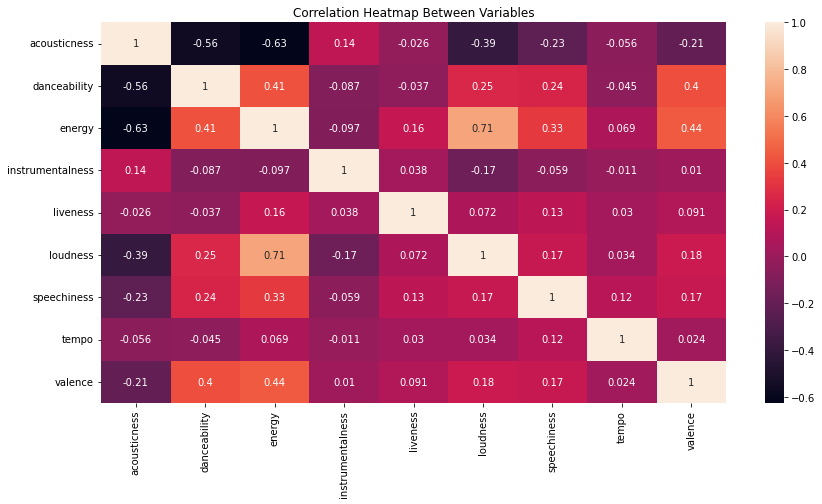

In [30]:
corr_df = df2.drop(["key", "mode", "track_href", "Singer", "id"],
                   axis=1).corr(method="pearson")
plt.figure(figsize=(14, 7))
heatmap = sns.heatmap(corr_df, annot=True,)
heatmap.set_title("Correlation Heatmap Between Variables")
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=90)


### regplot between loundness and energy in songs

[Text(0.5, 1.0, 'Loundness vs Energy Correlation')]

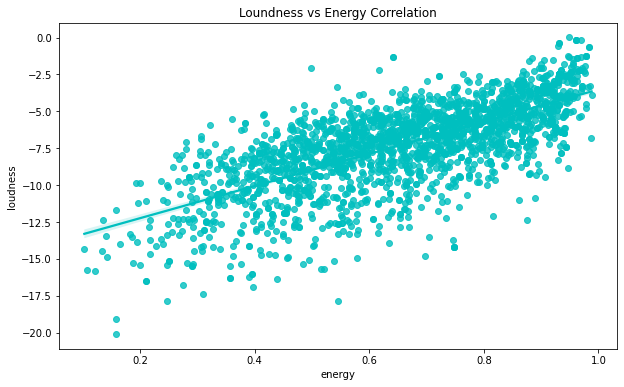

In [31]:
plt.figure(figsize=(10, 6))
sns.regplot(data=df2, y="loudness", x="energy", color="c").set(
    title="Loundness vs Energy Correlation")


### jointplot between loudness and energy in songs

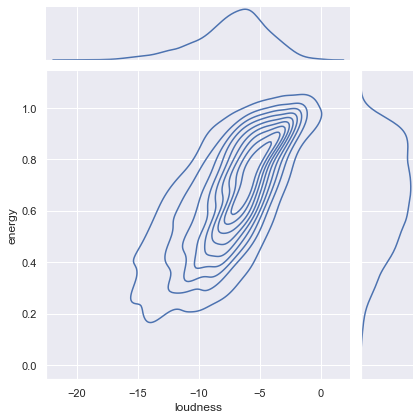

In [32]:
sns.set(rc={'figure.figsize': (20, 20)})
sns.jointplot(data=df2, x="loudness", y="energy", kind="kde")


### Top 10 Singers with number of songs

<AxesSubplot: >

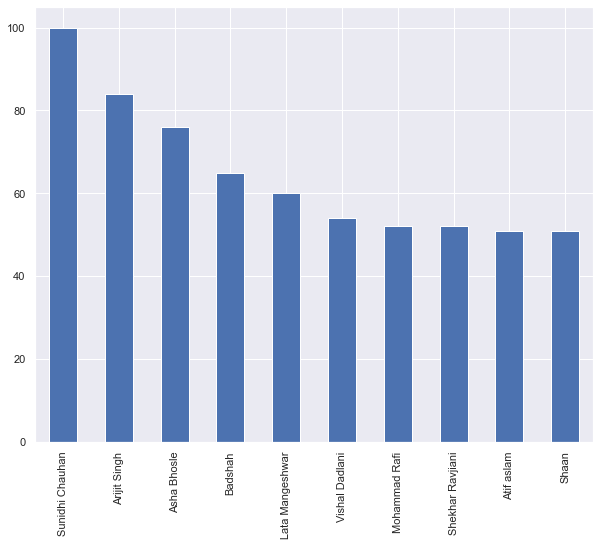

In [33]:
plt.figure(figsize=[10,8])
Top50IndArtistDF['Singer'].value_counts().head(10).plot.bar()

### columns in df1

In [34]:
Top50IndArtistDF.columns

Index(['Singer', 'acousticness', 'danceability', 'energy', 'id',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'Song name',
       'speechiness', 'tempo', 'track_href', 'valence'],
      dtype='object')

In [35]:
Top50IndArtistDF.head()

,Singer,acousticness,danceability,energy,id,instrumentalness,key,liveness,loudness,mode,Song name,speechiness,tempo,track_href,valence
0,Aastha Gill,0.48500,0.770,0.824,39ujbBjTwwqUFySaCYDMMT,0.000000,1,0.3180,-6.491,0,Proper Patola,0.0851,172.006,https://api.spotify.com/v1/tracks/39ujbBjTwwqU...,0.490
1,Aastha Gill,0.14300,0.825,0.666,5cjVsWqIkBQC7acTRhL0RO,0.000003,4,0.2370,-4.847,0,Kamariya,0.0554,96.987,https://api.spotify.com/v1/tracks/5cjVsWqIkBQC...,0.763
2,Aastha Gill,0.23600,0.663,0.551,3XYvdqcZrTmRntFDDbJkJd,0.000036,3,0.0923,-8.272,0,Buzz (feat. Badshah),0.1090,113.314,https://api.spotify.com/v1/tracks/3XYvdqcZrTmR...,0.601
3,Aastha Gill,0.00323,0.919,0.571,46GBoFCdFZZSjuGaZjZmGv,0.001680,5,0.1030,-7.175,0,Saara India,0.0687,105.007,https://api.spotify.com/v1/tracks/46GBoFCdFZZS...,0.231
4,Aastha Gill,0.12900,0.867,0.720,6VwVEIiCro1EMyh9B6Om3v,0.000000,9,0.2280,-5.188,0,Drunk n High,0.0619,104.974,https://api.spotify.com/v1/tracks/6VwVEIiCro1E...,0.755


### Top 10 singers with highest acousticness

<AxesSubplot: xlabel='Singer'>

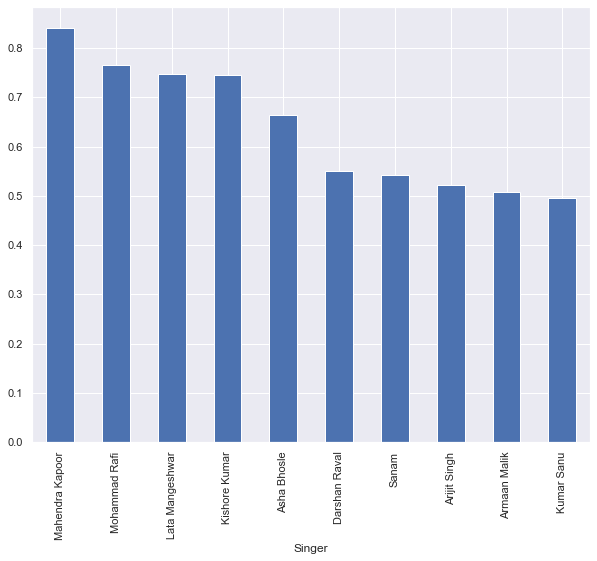

In [36]:
plt.figure(figsize=[10,8])
Top50IndArtistDF.groupby(['Singer'])['acousticness'].mean().sort_values(ascending=False).head(10).plot.bar()

### plotting piechart of songs other than singles

<AxesSubplot: ylabel='Song name'>

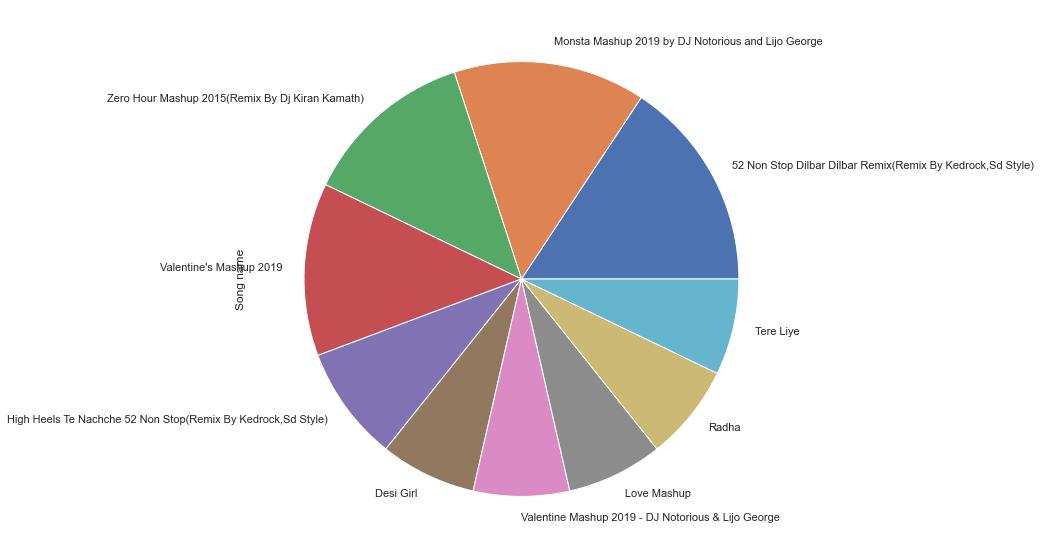

In [37]:
plt.figure(figsize=[12, 10])
Top50IndArtistDF['Song name'].value_counts().head(10).plot.pie()


### loudness in songs

<AxesSubplot: ylabel='loudness'>

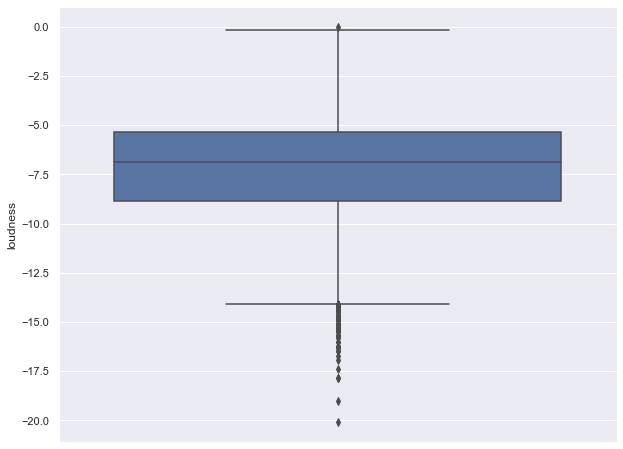

In [38]:
plt.figure(figsize=[10, 8])
sns.boxplot(y=Top50IndArtistDF['loudness'])


### Showing percentage of songs having mode 1 and rest 0

<AxesSubplot: ylabel='mode'>

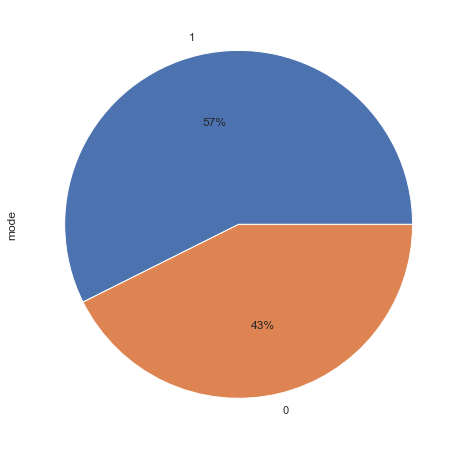

In [39]:
plt.figure(figsize=[10, 8])
Top50IndArtistDF['mode'].value_counts().plot.pie(autopct='%1.0F%%')


### Categorising on the basis of singer

In [40]:
Top50IndArtistDF.groupby(['Singer', 'Song name'])['liveness'].mean()


Singer          Song name            
AR Rahman       Aalaporaan Thamizhan     0.1090
                Aaruyire                 0.0741
                Afreeda                  0.0931
                Ale Ale                  0.0848
                Anbil Avan               0.0577
                                          ...  
Vishal Dadlani  Vashmalle                0.0861
                Vele                     0.2460
                Zaraa Dil Ko Thaam Lo    0.0416
                Zinda                    0.1160
                Zor Lagaake Haishaa      0.1080
Name: liveness, Length: 2162, dtype: float64

### Plotting scatterplot on liveness vs loudness

<AxesSubplot: xlabel='liveness', ylabel='loudness'>

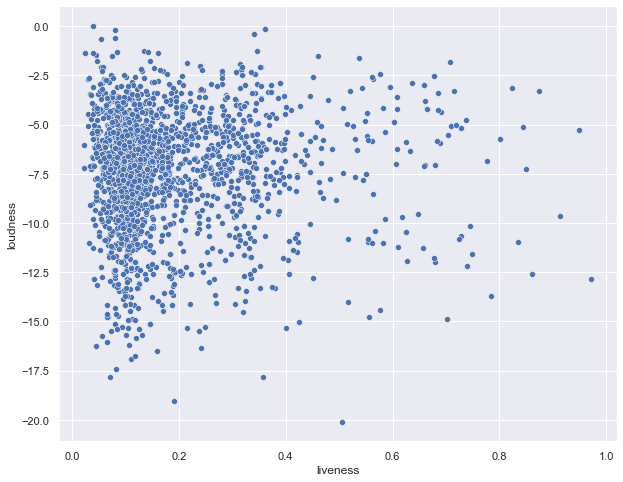

In [41]:
plt.figure(figsize=[10, 8])
sns.scatterplot(data=Top50IndArtistDF, x='liveness', y='loudness')


## **Conclusion**
By analysing the above data we can argue that the modern songs have more dancebility and acousticness to them.
Moreover, there is a decreasing trend in the speechiness of modern songs can be attributed to the increasing trend of EDM(Electronic Dance Music).
We also saw above how artists in India are making there songs according to there category of songs they usually sing.
Out of all the Given Album, No Name & Scars and Screws are rap albums and you can see high Dancebility, valence and energy in both of these.